# Deming回归
-------------------------------

这个函数显示如何使用TensorFlow来求解线性Deming回归。

$y = Ax + b$

我们使用iris数据集。

y = Sepal Length and x = Petal Width.

Demming回归也被称为完全最小均方回归，其最小化回归曲线与实际（x,y）点的垂直距离。

如果最小均方线性回归最小化到回归曲线的垂直距离，那么Deming回归就是最小化到回归曲线的所有距离。这种回归最小化x和y值的误差。如下图。

<img src="../images/05_demming_vs_linear_reg.png" width="512">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

/home/zhangxin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
sess = tf.Session()

# 设置随机种子
tf.set_random_seed(42)
np.random.seed(42)

In [4]:
# 加载数据
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data]) # Petal Width
y_vals = np.array([y[0] for y in iris.data]) # Sepal Length

In [5]:
# 声明批尺寸
batch_size = 125

# 占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 变量
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 声明运算
model_output = tf.add(tf.matmul(x_data, A), b)

对于deming回归损失函数，我们计算下式:

$$ \frac{\left| A \cdot x + b - y \right|}{\sqrt{A^{2} + 1}} $$

上式给出了点(x,y)到预测曲线$A \cdot x + b$之间的最短距离。

In [6]:
# 声明Demming损失函数
demming_numerator = tf.abs(tf.subtract(tf.add(tf.matmul(x_data, A), b), y_target))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [7]:
# 优化
my_opt = tf.train.GradientDescentOptimizer(0.25)
train_step = my_opt.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

In [8]:
# 迭代优化
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[3.0726154]] b = [[1.7809943]]
Loss = 0.47351122
Step #200 A = [[2.4791968]] b = [[2.5229053]]
Loss = 0.41200352
Step #300 A = [[1.7441037]] b = [[3.6184287]]
Loss = 0.37118948
Step #400 A = [[1.0046778]] b = [[4.544282]]
Loss = 0.26205814
Step #500 A = [[0.963949]] b = [[4.604995]]
Loss = 0.24395151
Step #600 A = [[0.96848977]] b = [[4.635706]]
Loss = 0.26403216
Step #700 A = [[1.0209333]] b = [[4.6014485]]
Loss = 0.28517577
Step #800 A = [[0.9960084]] b = [[4.5974665]]
Loss = 0.27671522
Step #900 A = [[1.0460051]] b = [[4.610528]]
Loss = 0.2906051
Step #1000 A = [[0.99913335]] b = [[4.652815]]
Loss = 0.25259653
Step #1100 A = [[1.0061337]] b = [[4.6475368]]
Loss = 0.27940717
Step #1200 A = [[0.9684684]] b = [[4.571068]]
Loss = 0.25259152
Step #1300 A = [[1.0069989]] b = [[4.586237]]
Loss = 0.2550671
Step #1400 A = [[1.0351934]] b = [[4.627562]]
Loss = 0.25665876
Step #1500 A = [[0.97222763]] b = [[4.604232]]
Loss = 0.24805544


得到优化后的A和b。

In [9]:
# 得到最优系数
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# 得到最优拟合曲线
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

用Matplotlib库画出实际数据和拟合曲线，以及训练损失变化情况。

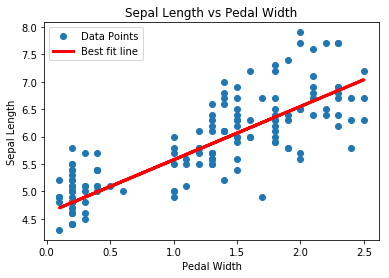

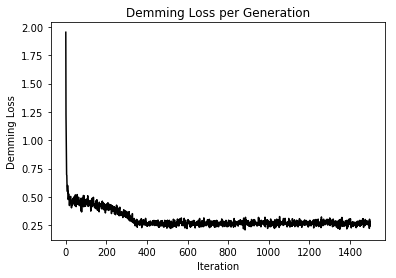

In [10]:
# 画出结果
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# 损失变化情况
plt.plot(loss_vec, 'k-')
plt.title('Demming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Demming Loss')
plt.show()